# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [87]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [88]:
corona_dataset_csv = pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [89]:
corona_dataset_csv.shape

(266, 104)

### Task 2.2: Delete the useless columns

In [90]:
corona_dataset_csv.drop(["Lat", "Long"], axis=1, inplace=True)

In [91]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Task 2.3: Aggregating the rows by the country

In [92]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [93]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [94]:
corona_dataset_aggregated.shape

(187, 100)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

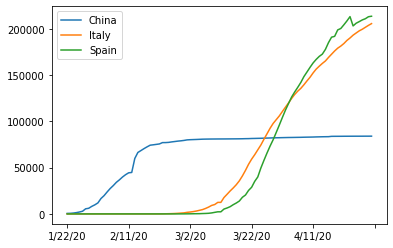

In [95]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

<AxesSubplot:>

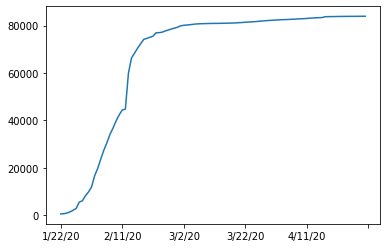

In [96]:
corona_dataset_aggregated.loc['China'].plot()

<AxesSubplot:>

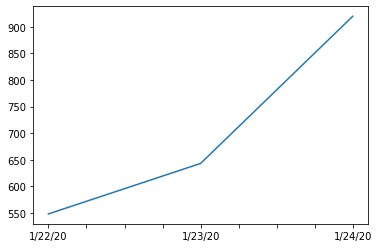

In [97]:
corona_dataset_aggregated.loc['China'][:3].plot()

### task 3.1: caculating the first derivative of the curve

<AxesSubplot:>

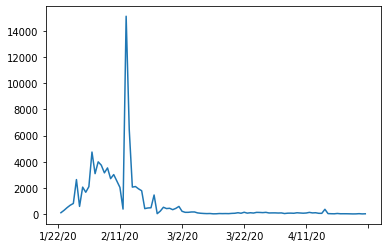

In [98]:
corona_dataset_aggregated.loc['China'].diff().plot()

### task 3.2: find maxmimum infection rate for China

In [99]:
corona_dataset_aggregated.loc['China'].diff().max()

15136.0

In [100]:
corona_dataset_aggregated.loc['Italy'].diff().max()

6557.0

In [101]:
corona_dataset_aggregated.loc['Spain'].diff().max()

9630.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [102]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for country in countries:
   max_infection_rates.append(corona_dataset_aggregated.loc[country].diff().max())
corona_dataset_aggregated['max_infection_rate'] = max_infection_rates

In [103]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Task 3.4: create a new dataframe with only needed column 

In [104]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [105]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [106]:
happiness_report = pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [107]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns 

In [108]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [109]:
for cols in useless_cols:
    happiness_report.drop([cols], axis=1, inplace=True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [110]:
happiness_report.set_index("Country or region", inplace=True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [111]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


#### wolrd happiness report Dataset :

In [112]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [113]:
data = corona_data.join(happiness_report, how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 4.5: correlation matrix 

In [114]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [115]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

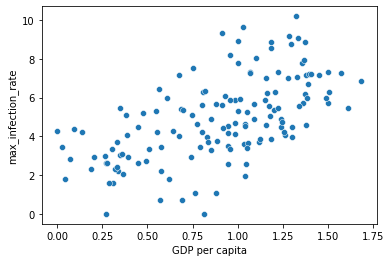

In [116]:
x = data['GDP per capita']
y = data['max_infection_rate']
sns.scatterplot(x=x, y=np.log(y))

C:\Users\DJ-X\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

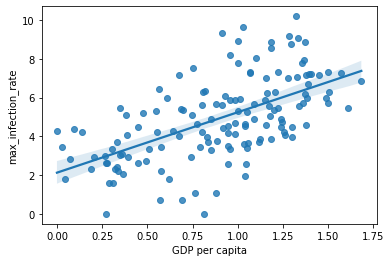

In [117]:
sns.regplot(x, np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

C:\Users\DJ-X\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

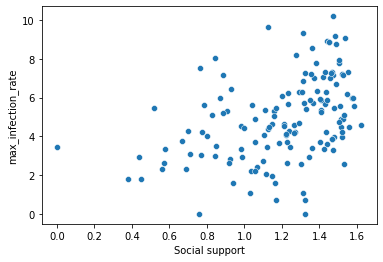

In [118]:
x = data['Social support']
y = data['max_infection_rate']
sns.scatterplot(x, np.log(y))

C:\Users\DJ-X\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

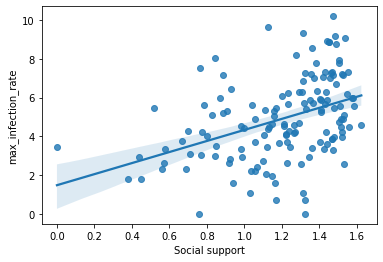

In [119]:
sns.regplot(x, np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

C:\Users\DJ-X\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

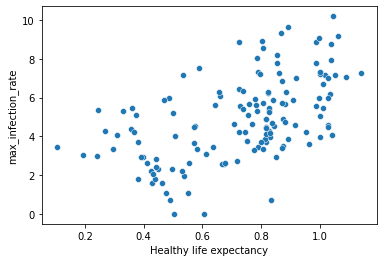

In [120]:
x = data['Healthy life expectancy']
y = data['max_infection_rate']
sns.scatterplot(x, np.log(y))

C:\Users\DJ-X\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

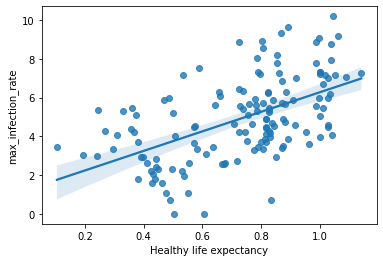

In [121]:
sns.regplot(x, np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

C:\Users\DJ-X\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

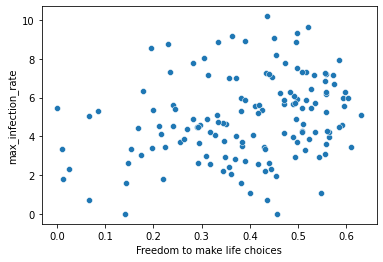

In [122]:
x = data['Freedom to make life choices']
y = data['max_infection_rate']
sns.scatterplot(x, np.log(y))

C:\Users\DJ-X\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

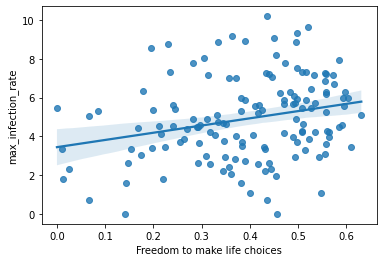

In [123]:
sns.regplot(x, np.log(y))

### Importing the C19 Deaths Dataset

In [124]:
corona_deaths = pd.read_csv("Datasets/covid19_deaths_dataset.csv")
corona_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [125]:
corona_deaths.drop(['Lat', 'Long'], axis=1, inplace=True)
corona_deaths.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [126]:
corona_deaths_aggregated = corona_deaths.groupby("Country/Region").sum()
corona_deaths_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [127]:
corona_deaths_aggregated.loc['India'].diff().max()
max_death_rates = []
death_countries = list(corona_dataset_aggregated.index)

In [128]:
for country in death_countries:
    max_death_rates.append(corona_deaths_aggregated.loc[country].diff().max())
max_death_rates

[7.0,
 4.0,
 30.0,
 4.0,
 2.0,
 1.0,
 13.0,
 3.0,
 8.0,
 30.0,
 3.0,
 3.0,
 1.0,
 15.0,
 1.0,
 5.0,
 496.0,
 1.0,
 1.0,
 0.0,
 6.0,
 6.0,
 1.0,
 493.0,
 1.0,
 6.0,
 4.0,
 2.0,
 1.0,
 1.0,
 0.0,
 20.0,
 251.0,
 0.0,
 3.0,
 13.0,
 1290.0,
 26.0,
 0.0,
 3.0,
 5.0,
 1.0,
 4.0,
 8.0,
 6.0,
 2.0,
 18.0,
 22.0,
 2.0,
 1.0,
 0.0,
 38.0,
 208.0,
 22.0,
 1.0,
 1.0,
 0.0,
 6.0,
 1.0,
 2.0,
 0.0,
 43.0,
 1440.0,
 1.0,
 1.0,
 1.0,
 510.0,
 5.0,
 10.0,
 0.0,
 3.0,
 2.0,
 1.0,
 2.0,
 2.0,
 0.0,
 8.0,
 23.0,
 5.0,
 75.0,
 60.0,
 158.0,
 7.0,
 220.0,
 13.0,
 919.0,
 2.0,
 47.0,
 2.0,
 5.0,
 2.0,
 11.0,
 10.0,
 4.0,
 3.0,
 0.0,
 4.0,
 2.0,
 4.0,
 1.0,
 1.0,
 6.0,
 8.0,
 2.0,
 0.0,
 1.0,
 8.0,
 1.0,
 4.0,
 1.0,
 1.0,
 2.0,
 163.0,
 10.0,
 2.0,
 0.0,
 1.0,
 12.0,
 0.0,
 0.0,
 0.0,
 234.0,
 4.0,
 1.0,
 4.0,
 7.0,
 6.0,
 16.0,
 2.0,
 42.0,
 11.0,
 0.0,
 2.0,
 108.0,
 50.0,
 40.0,
 37.0,
 2.0,
 34.0,
 105.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 9.0,
 2.0,
 54.0,
 0.0,
 3.0,
 2.0,
 4.0,
 6.0,
 8.0,
 14.0,
 0.

In [129]:
corona_deaths_aggregated["max_death_rate"] = max_death_rates
corona_deaths_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


In [130]:
corona_death_data = pd.DataFrame(corona_deaths_aggregated['max_death_rate'])
corona_death_data.head()

,max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


## Combining Death Rate data with Infection Data and Generating IFR (Infection Fatality Rate)

In [131]:
combined_data = data.join(corona_death_data, how='inner')
combined_data['IFR'] = ((combined_data['max_death_rate']/combined_data['max_infection_rate']) * 100)
combined_data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_death_rate,IFR
Afghanistan,232.0,0.350,0.517,0.361,0.000,7.0,3.017241
Albania,34.0,0.947,0.848,0.874,0.383,4.0,11.764706
Algeria,199.0,1.002,1.160,0.785,0.086,30.0,15.075377
Argentina,291.0,1.092,1.432,0.881,0.471,13.0,4.467354
Armenia,134.0,0.850,1.055,0.815,0.283,3.0,2.238806


## Visualising Data

### Plotting Infection Rate to Death Rate

<AxesSubplot:xlabel='max_infection_rate', ylabel='max_death_rate'>

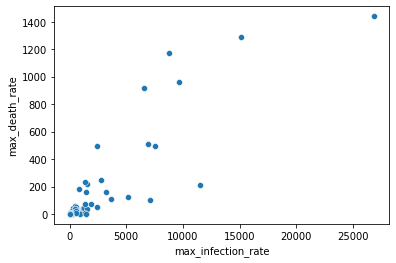

In [132]:
x = combined_data['max_infection_rate']
y = combined_data['max_death_rate']
sns.scatterplot(x=x, y=y)

<AxesSubplot:xlabel='max_infection_rate', ylabel='max_death_rate'>

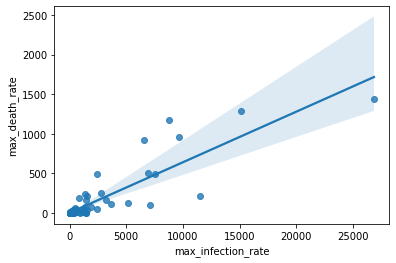

In [133]:
sns.regplot(x=x, y=y)

### Comparing IFR% v/s GDP per capita and Freedom to make life choices

<AxesSubplot:xlabel='GDP per capita', ylabel='IFR'>

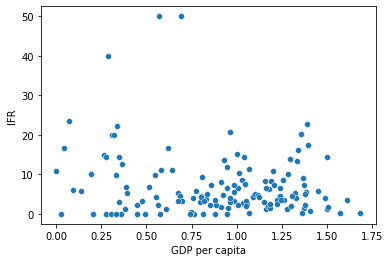

In [134]:
x = combined_data['GDP per capita']
y = combined_data['IFR']
sns.scatterplot(x=x, y=y)

<AxesSubplot:xlabel='GDP per capita', ylabel='IFR'>

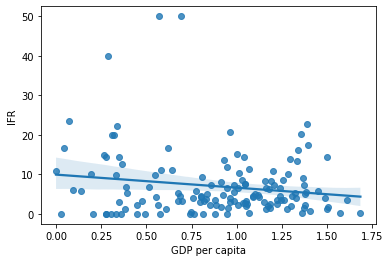

In [135]:
sns.regplot(x=x, y=y)

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='IFR'>

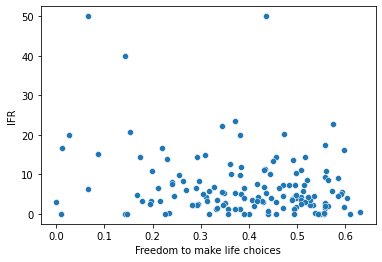

In [136]:
x = combined_data['Freedom to make life choices']
y = combined_data['IFR']
sns.scatterplot(x=x, y=y)

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='IFR'>

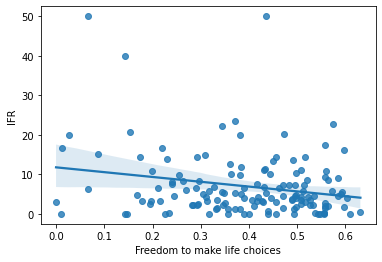

In [137]:
sns.regplot(x=x, y=y)

### We can notice that the Higher the GDP per capita and Higher Freedom to make life choices, Lower the IFR %

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='IFR'>

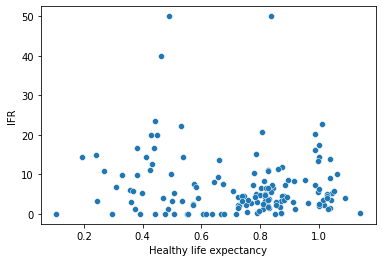

In [138]:
x = combined_data['Healthy life expectancy']
y = combined_data['IFR']
sns.scatterplot(x=x, y=y)

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='IFR'>

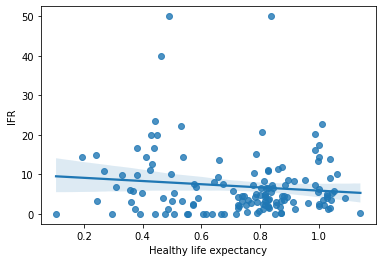

In [139]:
sns.regplot(x=x, y=y)

# Conclusion

## We can notice that, as the Happiness Index increases, the total IFR percentage of a country usually drops. This is due to the higher amount of amenities, freedom and the knowledge of the country.